## 电商数据分析

#### 本项目模拟一家电商零售公司的历史订单数据分析，旨在通过对销量、GMV、品类贡献度、客户结构等维度的分析，为企业的市场策略、促销计划和库存优化提供数据支撑。

## 项目目标（Business Questions）

1. 按商品类别统计销售额（Category-wise Sales Analysis）
2. 分析 GMV 的月度趋势（Monthly GMV Trend）
3. 不同客户类型 Segment 的销售贡献分析
4. 区域销售表现（Region-wise Sales）

In [69]:
import pandas as pd
import numpy as np

In [70]:
df=pd.read_csv(r"C:\Users\93019\Desktop\数据分析\评估数据\06\train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


#### 检查数据的整齐度与完整度

数据的整齐度：查看，每一列代表一个变量，每一行代表一个观测（订单），每一个单元格代表一个值
完整度：检查数据是否有 空值、重复值、异常值、不一致值

#### 数据的整齐度

In [71]:
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


通过前10行的分析，我们看到，数据符合每一列代表一个变量，每一行代表一个观测（订单），每一个单元格代表一个值

#### 数据完整度

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

为了方便区分，我们将后面清理的数据命名为clean_df

In [73]:
clean_df=df.copy()
clean_df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


#### 修改错误类型

In [74]:
clean_df["Order Date"] = pd.to_datetime(clean_df["Order Date"],format="%d/%m/%Y")
clean_df["Ship Date"] = pd.to_datetime(clean_df["Ship Date"],format="%d/%m/%Y")

In [75]:
clean_df['Postal Code'] = clean_df['Postal Code'].astype('Int64').astype('string')
clean_df["Category"]=clean_df["Category"].astype("category")
clean_df["Sub-Category"]=clean_df["Sub-Category"].astype("category")

接下来查看Postal Code 的空值情况

In [76]:
clean_df[clean_df['Postal Code'].isna()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,2018-12-05,2018-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,<NA>,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,2016-11-07,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,<NA>,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,2017-04-06,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,<NA>,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,<NA>,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,<NA>,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,<NA>,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,<NA>,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,<NA>,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,<NA>,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,<NA>,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


从上面可以看出，缺失的Postal Code，全部为Burlington Vermont地区的，但这个缺失值，并不影响我们最终的分析，所以暂时不处理

#### 重复值检查

In [77]:
clean_df.duplicated().sum()

np.int64(0)

没有完全相同的行

#### 异常值检查

In [78]:
clean_df.describe()

,Row ID,Order Date,Ship Date,Sales
count,9800.000000,9800,9800,9800.000000
mean,4900.500000,2017-05-01 05:13:51.673469440,2017-05-05 04:17:52.653061120,230.769059
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,0.444000
25%,2450.750000,2016-05-24 00:00:00,2016-05-27 18:00:00,17.248000
50%,4900.500000,2017-06-26 00:00:00,2017-06-29 00:00:00,54.490000
75%,7350.250000,2018-05-15 00:00:00,2018-05-19 00:00:00,210.605000
max,9800.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,22638.480000
std,2829.160653,NaN,NaN,626.651875


clean_df数据没有异常值

#### 不一致值检查 

在这个表格中，我们查看我们相关数据容易出现不一致的选项 Segment，Category，Region，Sub-Category

In [79]:
clean_df['Segment'].value_counts()
clean_df['Category'].value_counts()
clean_df['Region'].value_counts()
clean_df['Sub-Category'].value_counts()

print(clean_df['Segment'].value_counts())
print(clean_df['Category'].value_counts())
print(clean_df['Region'].value_counts())
print(clean_df['Sub-Category'].value_counts())


Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64
Category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: count, dtype: int64
Region
West       3140
East       2785
Central    2277
South      1598
Name: count, dtype: int64
Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: count, dtype: int64


从数据可以看出来，没有出现不一致值

### 数据分析

### 各品种销售额分析

In [80]:
Category_sales=clean_df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
Category_sales

C:\Users\93019\AppData\Local\Temp\ipykernel_65964\3655098000.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Category_sales=clean_df.groupby('Category')['Sales'].sum().sort_values(ascending=False)


Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64

<Axes: title={'center': 'Sales by Category'}, xlabel='Category'>

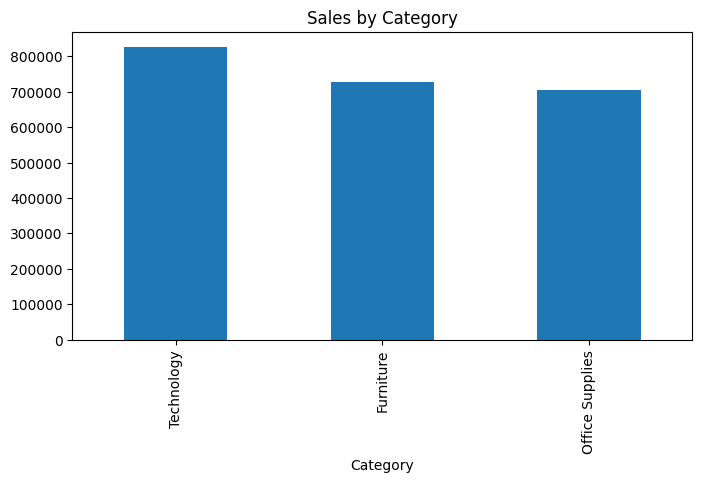

In [81]:
Category_sales.plot(kind='bar', figsize=(8,4), title='Sales by Category')

从数据可以看到，Technology类销售额最高,占比GMV最高，Furniture第二，Office Supplies 第三

In [82]:
sub_Category_sales=clean_df.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index().sort_values('Sales',ascending=False)

sub_Category_sales.query('Sales>0')

C:\Users\93019\AppData\Local\Temp\ipykernel_65964\4254391524.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub_Category_sales=clean_df.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index().sort_values('Sales',ascending=False)


,Category,Sub-Category,Sales
47,Technology,Phones,327782.4480
5,Furniture,Chairs,322822.7310
31,Office Supplies,Storage,219343.3920
16,Furniture,Tables,202810.6280
20,Office Supplies,Binders,200028.7850
45,Technology,Machines,189238.6310
34,Technology,Accessories,164186.7000
40,Technology,Copiers,146248.0940
4,Furniture,Bookcases,113813.1987
18,Office Supplies,Appliances,104618.4030


In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
order = sub_Category_sales.sort_values('Sales', ascending=False)['Sub-Category']

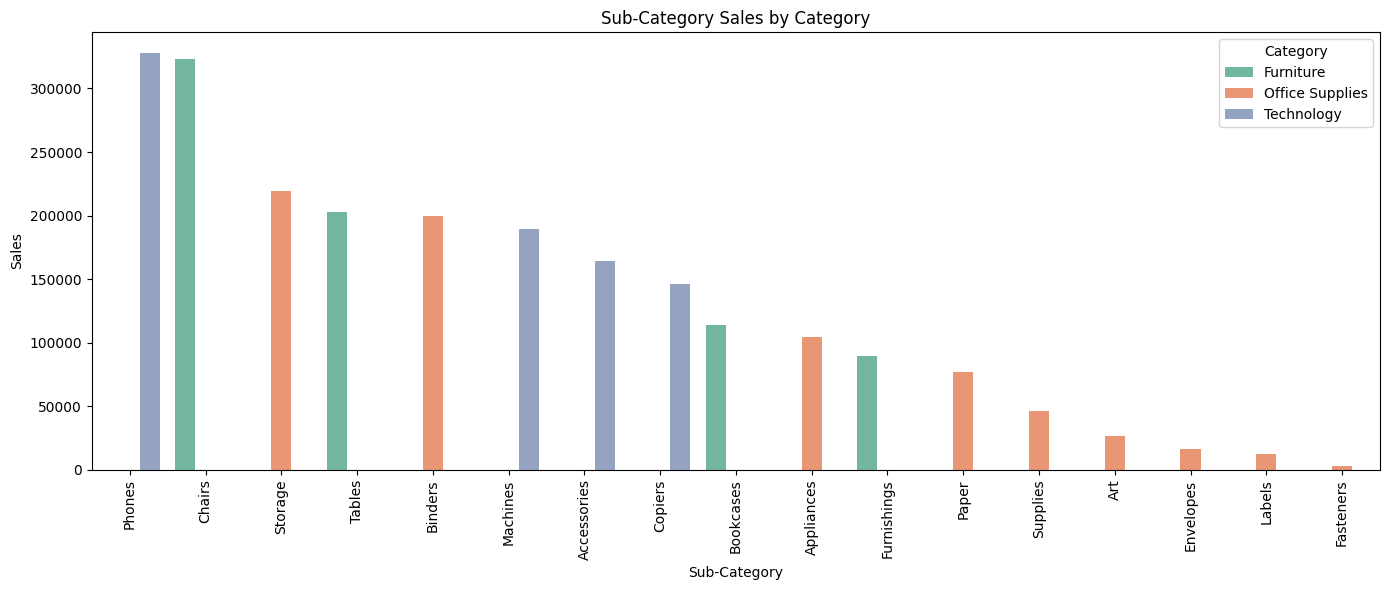

In [85]:
plt.figure(figsize=(14,6))
sns.barplot(
    data=sub_Category_sales,
    x='Sub-Category',
    y='Sales',
    hue='Category',
    palette='Set2',
    order=order 
)
plt.xticks(rotation=90)
plt.title('Sub-Category Sales by Category')
plt.tight_layout()
plt.show()

子类别（Sub-Category）销售额中，排名前五的分别是：Phones、Chairs、Storage、Tables 和 Binders，这几个子类别贡献了最高的 GMV，是整体销售的主要驱动力。其中 Technology 类别的子分类（尤其是 Phones）占比最高，建议继续增加相关产品的供给或营销投入。

销量最低的五个子类别为：Fasteners、Labels、Envelopes、Art 和 Supplies，这五个全部属于 Office Supplies 类别。由于整体表现偏弱，可以考虑对 Office Supplies 下的这些品类进行优化，例如减少库存、调整种类结构或评估是否继续保留这些低贡献品类。

### Segment 销售额分析

In [86]:
Segment_sales=clean_df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
Segment_sales

Segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.249822e+05
Name: Sales, dtype: float64

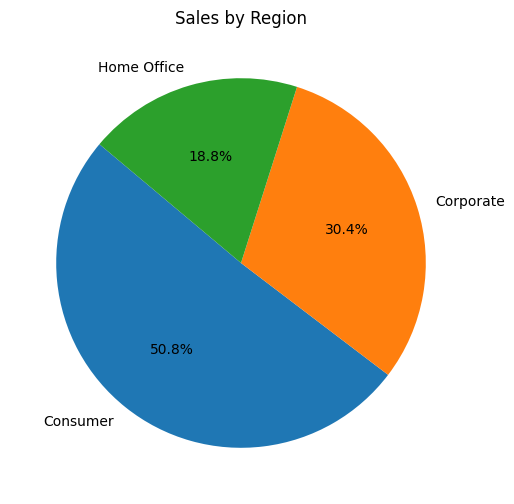

In [87]:
Segment_sales.plot(
    kind='pie',
    figsize=(6,6),
    autopct='%1.1f%%',       # ⭐ 显示百分比
    startangle=140,          # ⭐ 旋转角度，让图更美观
    ylabel='',               # ⭐ 去掉默认的 y label
    title='Sales by Region'
)
plt.show()


1. Consumer（个人消费者）是核心客户群体
占总 GMV 的 50.8%，约占一半
说明平台以 B2C 零售模式为主
需求量大、交易频次高，是最重要的增长驱动因素

2. Corporate（企业客户）贡献稳定
排名第二，企业客户通常 客单价更高，但交易次数略少
可以通过企业团购、合同订单提升该部分 GMV

3. Home Office（家庭办公类客户）占比最小
虽占比不高，但这一类客户通常对
高质量办公用品
小型办公设备
有更高需求，可通过精准营销提升客单价

### GMV 月度趋势分析

In [88]:
clean_df['YearMonth'] = clean_df['Order Date'].dt.to_period('M')

In [89]:
monthly_gmv = clean_df.groupby('YearMonth')['Sales'].sum()
monthly_gmv

YearMonth
2015-01     14205.7070
2015-02      4519.8920
2015-03     55205.7970
2015-04     27906.8550
2015-05     23644.3030
2015-06     34322.9356
2015-07     33781.5430
2015-08     27117.5365
2015-09     81623.5268
2015-10     31453.3930
2015-11     77907.6607
2015-12     68167.0585
2016-01     18066.9576
2016-02     11951.4110
2016-03     32339.3184
2016-04     34154.4685
2016-05     29959.5305
2016-06     23599.3740
2016-07     28608.2590
2016-08     36818.3422
2016-09     63133.6060
2016-10     31011.7375
2016-11     75249.3995
2016-12     74543.6012
2017-01     18542.4910
2017-02     22978.8150
2017-03     51165.0590
2017-04     38679.7670
2017-05     56656.9080
2017-06     39724.4860
2017-07     38320.7830
2017-08     30542.2003
2017-09     69193.3909
2017-10     59583.0330
2017-11     79066.4958
2017-12     95739.1210
2018-01     43476.4740
2018-02     19920.9974
2018-03     58863.4128
2018-04     35541.9101
2018-05     43825.9822
2018-06     48190.7277
2018-07     44825.1040
2

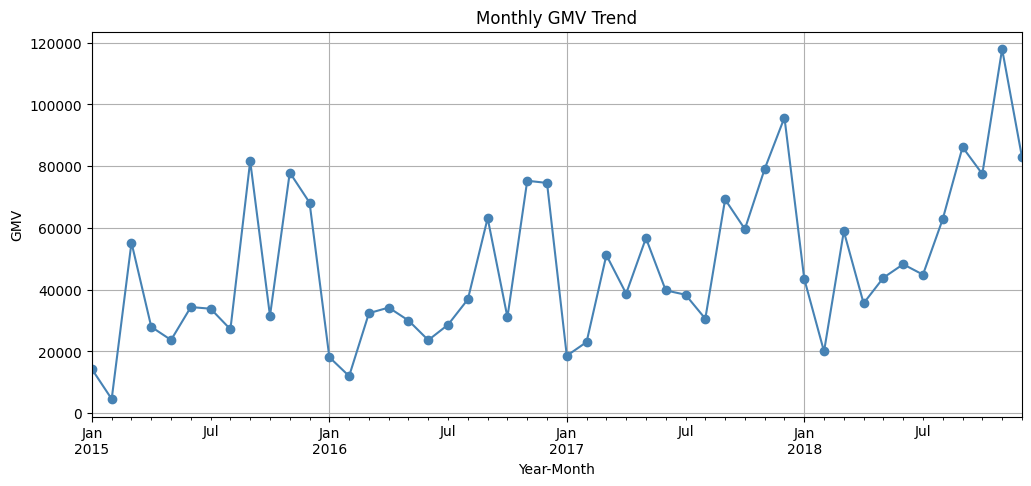

In [90]:
monthly_gmv.plot(
    kind='line',
    figsize=(12,5),
    marker='o',
    color='steelblue',
    title='Monthly GMV Trend'
)
plt.ylabel('GMV')
plt.xlabel('Year-Month')
plt.grid(True)
plt.show()

1. 整体趋势：GMV 呈明显上升趋势

从 2015 年初到 2018 年末：

初期 GMV 多数月度在 2万–5万 左右波动

到 2018 年，多数月份增长至 6万–10万+

2018 年末达到全时期最高点（接近 12 万）

说明业务规模持续扩大，销售增长趋势非常明显


2. 年度特征：GMV 每年均呈阶梯式增长

观察年际变化：

2015 年：整体 GMV 较低，常在 2–4 万区间

2016 年：逐步提升，出现 6–8 万的月度峰值

2017 年：GMV 中段明显抬升，稳定在 3–7 万之间

2018 年：增长最明显，多月突破 8–10 万，年底达到峰值

业务增长连续 4 年处于扩张期，不属于偶发性上涨，而是长期增长。


3. 季节性现象：强烈的年末销售高峰（Q4）

每一年的 GMV 高峰均出现在：

10 月

11 月

12 月

尤其是：

2016 Q4

2017 Q4

2018 Q4（最高达到 119k+）

典型季节性：年底销售旺季（假日、促销、购物季）

这是一个非常常见的零售类模式（类似黑五、圣诞节带动消费高峰）。


4. 低谷期：每年年初 GMV 都偏低

每年的：

1 月

2 月

GMV 都会明显下降。

 这也是典型季节性（节假日后消费者需求降低）。


5. 波动性

图中还可以观察到：

某些月份 GMV 会突然下滑

随后很快反弹（尤其是 Q1-Q2 区间）

说明业务呈现：

促销强驱动

需求波动较大

大额订单集中在部分月份



“整体来看，2015–2018 年 GMV 呈持续上升趋势，年增长稳定，且存在明显季节性：每年 Q4（10–12 月）是销售旺季，GMV 多月突破年度高点；而 Q1（1–2 月）通常为低谷期。2018 年表现尤为突出，年底达到整个时间段的最高 GMV 峰值，说明业务规模持续扩张，年度销售能力不断增强。”

### Region销售额分析

In [91]:
Region_sales=clean_df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
Region_sales

Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64

<Axes: title={'center': 'Sales by Region'}, xlabel='Region'>

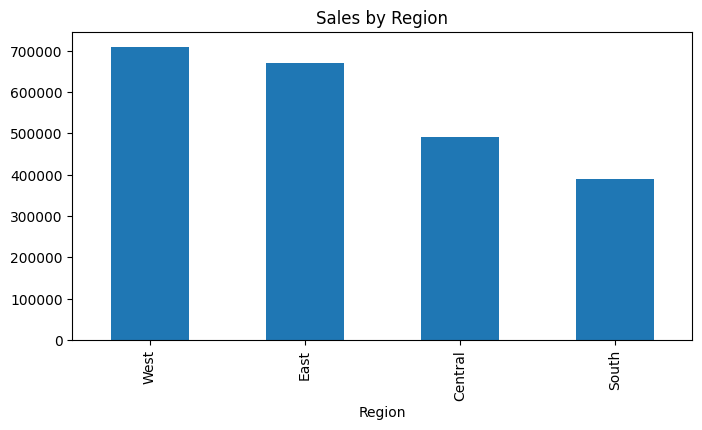

In [92]:
Region_sales.plot(kind='bar', figsize=(8,4), title='Sales by Region')

总体来看，West 与 East 是公司的核心收入来源，贡献超过全体销售的主要部分；Central 属于中级市场、具备可提升空间；South 区域表现较弱，是潜在增长点。

### 前10产品分析

In [93]:
product_sales = (
    clean_df.groupby('Product Name')['Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

product_sales

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64

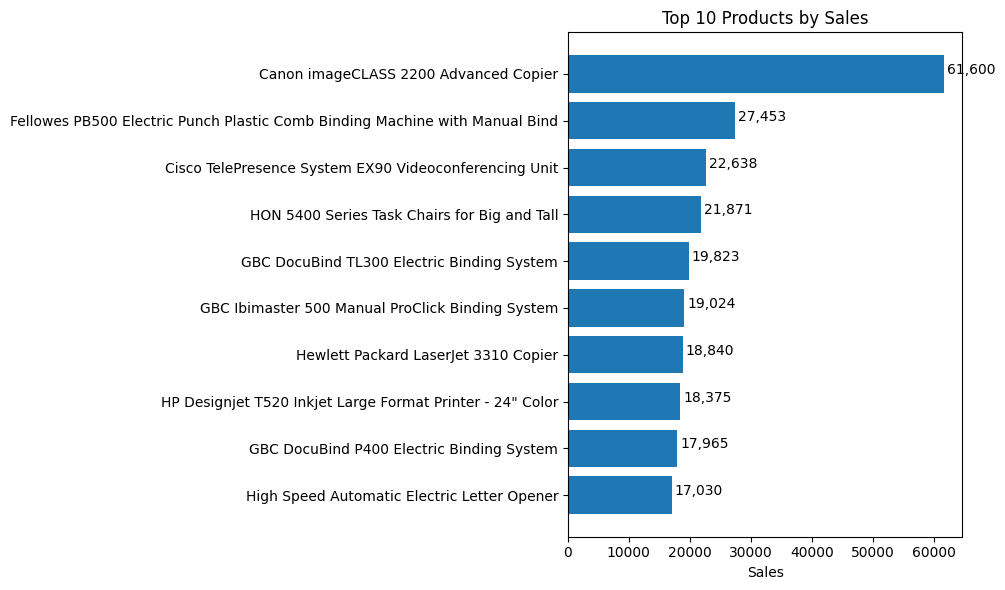

In [94]:
product_sales_sorted = product_sales.sort_values(ascending=True)

plt.figure(figsize=(10,6))
bars = plt.barh(product_sales_sorted.index, product_sales_sorted.values)

plt.title('Top 10 Products by Sales')
plt.xlabel('Sales')

# 添加数值标签
for bar in bars:
    plt.text(
        bar.get_width() + 500,
        bar.get_y() + bar.get_height()/2,
        f"{bar.get_width():,.0f}"
    )

plt.tight_layout()
plt.show()

1. Canon imageCLASS 2200 Advanced Copier 为绝对的 GMV 冠军

销售额达到 61,599.82，显著高于其他产品

属于高价值、高客单价的办公设备

对整体营收贡献最大，是该类别的核心增长点


2. 其余 9 个产品属于高客单价设备

包括：

Fellowes PB500 Electric Punch

Cisco TelePresence EX90

HON 5400 Series Task Chairs

GBC DocuBind 系列

HP / Hewlett Packard 打印机设备

这些设备单价较高、需求相对稳定，构成了销售的“腰部力量”。


3. 产品结构特点

大部分 Top 产品属于 Technology / Office Supplies 类

产品均为 办公设备类（copier / binding / telepresence / printer）

无低价耗材上榜，说明收入主要来自高端办公设备销售


4. 业务含义

GMV 对高客单价设备依赖较强 → 易受大客户订单影响

产品销量呈明显集中趋势 → 重点管理库存与供应链

建议在这些高价值产品上加强销售策略，如：

企业采购打包销售

提供延保、服务套餐提升复购

加强营销曝光以维持高 GMV

## 总结

1. 项目目标概述

本项目基于 Superstore 销售数据（2015–2018），通过 Python（Pandas、Matplotlib、Seaborn）完成数据清洗、EDA 分析与可视化，旨在从不同维度（品类、客户类型、区域、产品、时间趋势）识别业务结构特征，发现增长机会。

2. 数据清洗与质量检查

将日期字段转换为 datetime 类型，新增 YearMonth 用于时间序列分析

Postal Code 缺失值检查：缺失率极低，且不影响整体分析（非关键字段）

多字段一致性检查（Segment、Region、Category 结构正常）

数据无明显重复订单，整体质量良好

数据质量：整体结构清晰，适合做业务分析

3. 主要分析结果与洞察
    
（1）品类（Category & Sub-Category）分析

Technology 类别 GMV 最高，是核心收入来源

Furniture 次之，Office Supplies 最低

子类别 Top 5：Phones、Chairs、Storage、Tables、Binders

子类别 Bottom 5：Fasteners、Labels、Envelopes、Art、Supplies

业务含义：

GMV 高度集中在科技类与办公家具类

建议在高 GMV 产品线上重点投入资源（库存/营销/供应链）

可对低贡献类别减少库存或采用自动补货机制

（2）客户类型（Segment）分析

Consumer（消费者）占比最高，达到 50.8%

Corporate（企业客户）次之

Home Office 占比较低

业务含义：

当前业务高度依赖 B2C 市场

企业客户具备高价值，可重点拓展

Home Office 客群适合做精细化运营

（3）区域（Region）分析

销售主要集中在 West 与 East 区域

South 与 Central 区域较弱

业务含义：

可对高潜区域加强品牌曝光

对低渗透区域启动促销策略或区域运营增长计划


（4）Top 10 产品分析

GMV 集中度高，主要由高客单价办公设备贡献（打印机、装订机、视频会议设备）

Top1 为 Canon imageCLASS 2200 Advanced Copier（61,599.82）

大部分产品来自 Technology 和 Office Supplies 类别

业务含义：

高价值设备应成为重点维护的明星产品

适合推出企业打包服务 / 延保方案

库存与供应链需优先保障


（5）月度 GMV 趋势（时间序列分析 — 最重要）

2015–2018 四年 GMV 呈 持续稳定上升趋势

年末（10–12 月）为每年销售峰值（季节性强）

年初（1–2 月）为最低谷

2018 年表现最强，12 月达到全时期最高 GMV（近 12 万）


业务含义：

零售旺季集中在 Q4，应提前准备促销节奏与库存

Q1 可加强低价产品或复购类产品推送

销售表现良好且呈增长态势，业务健康稳定

4. 总体业务洞察总结

业务结构以高价值设备和科技类产品为主要驱动因素

GMV增长稳定，且具有明显的季节性规律（Q4 旺季）

客户结构仍偏向 B2C，但企业客户具备更高扩展价值

区域销售不均衡，有机会针对性提升弱势区域表现

产品集中度高，需要重点关注 Top 产品的供应链与品牌策略


5. 可行动建议（Actionable Recommendations）
针对品类

强化 Phones、Chairs、Storage 等高 GMV 产品的库存保障与促销力度

对低贡献产品采取低成本运营策略（自动补货 / 降低库存）

针对客户

加强 Consumer 市场优惠活动

针对 Corporate 提供大客优惠、企业采购打包方案

对 Home Office 客户做高价值 CRM 精细化运营

针对区域

加强 West/East 成熟区域的精细化运营

South/Central 可通过区域促销推动增长

针对产品

聚焦高 GMV、强品牌产品的运营，与供应链紧密联动

优化 Top 产品的营销策略（曝光+促销+捆绑）

针对时间趋势

Q4 旺季提前准备库存与营销

Q1 落点期推低价与复购产品，平衡淡季表现


6. 技术栈总结

Python：Pandas、NumPy

可视化：Matplotlib、Seaborn

数据清洗：缺失值处理、日期格式处理、类型转换

EDA：类别分析、子类别分析、Segment 分析、区域分析、时间序列分析、Top10 产品分析

可视化图表：柱状图、饼图、折线图、横向柱状图